In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../02_dataset/merged_df.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.sample(15)

,ISO3_code,Year,country,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,pt_gdp_agriculture,...,gdp_pchange,gdp_percap,gdp_percap_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
4741,LBN,2023,Lebanon,612.277778,0.165072,0.068991,162.444444,0.041311,-0.034720,6.794856,...,-76.958522,5345.5120,-53.415007,11.565,-0.293129,0.318325,0.000000,NaN,NaN,NaN
323,ARM,1960,Armenia,478.263889,-0.348062,-0.348062,79.194444,-0.023676,-0.023676,18.434763,...,NaN,2958.8804,NaN,1.600,NaN,0.315673,NaN,NaN,NaN,NaN
3025,GAB,1986,Gabon,1535.153257,-0.103393,0.020483,246.622605,-0.001385,-0.010489,9.244931,...,-0.803601,17911.1460,0.000000,16.910,0.000000,0.401047,0.000000,NaN,NaN,NaN
8656,UKR,1984,Ukraine,437.914881,0.063262,-0.018289,79.031845,-0.124864,0.097311,24.648829,...,0.000000,9646.0550,0.000000,1.900,0.000000,0.276072,0.000000,NaN,NaN,NaN
3302,GRC,1976,Greece,607.994253,0.087297,0.017315,127.031609,-0.046112,0.007752,6.869984,...,6.851904,26841.9100,0.000000,7.572,0.000000,0.344448,0.000000,NaN,NaN,NaN
351,ARM,1988,Armenia,691.375000,0.409391,-0.074873,67.784722,-0.070115,-0.013903,18.434763,...,0.000000,2958.8804,0.000000,1.600,0.000000,0.315673,0.000000,NaN,NaN,NaN
7198,SRB,1978,Serbia,636.928571,0.049536,-0.012816,96.047619,-0.108804,0.079074,15.711183,...,0.000000,9550.5610,0.000000,8.683,0.000000,0.372673,0.000000,NaN,NaN,NaN
2260,DJI,1960,Djibouti,103.250000,1.140940,1.140940,283.354167,-0.008896,-0.008896,1.839329,...,NaN,4446.4136,NaN,25.999,NaN,0.427013,NaN,NaN,NaN,NaN
3367,GTM,1977,Guatemala,1605.846154,-0.066693,0.042860,229.619658,0.014616,-0.015028,26.305160,...,7.809223,7597.3696,0.000000,2.174,0.000000,0.532243,0.000000,NaN,NaN,NaN
1391,CAN,1971,Canada,391.781156,0.061908,-0.006913,-73.239421,-0.025110,0.081392,2.196213,...,4.018844,38433.0900,0.000000,5.280,0.000000,0.372467,12.678068,NaN,NaN,NaN


In [3]:
df.columns

Index(['ISO3_code', 'Year', 'country', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'yearly_avg_temp', 'temp_var_t', 'temp_var_t_1',
       'pt_gdp_agriculture', 'oil_rent', 'democracy_polity',
       'ethnic_fractionation_index', 'gdp', 'gdp_pchange', 'gdp_percap',
       'gdp_percap_pchange', 'unemp_rate', 'unemp_rate_pchange', 'gini',
       'gini_pchange', 'population', 'participants', 'protest_fraction'],
      dtype='object')

In [4]:
df.country.nunique()

156

In [5]:
# find sample countries, those with high pt_gdp_agriculture, and with protest data
#further subset to only include data from 1990, drop ones without ISO code, as we have no features explaining the protest in these countries
sub_df = df[df['Year']>1989]
sub_df.dropna(subset='ISO3_code', inplace=True)
sub_df.country.nunique()

C:\Users\felic\AppData\Local\Temp\ipykernel_8368\1980248275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.dropna(subset='ISO3_code', inplace=True)


138

In [6]:
sub_df.drop_duplicates(inplace=True)

C:\Users\felic\AppData\Local\Temp\ipykernel_8368\1476074587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.drop_duplicates(inplace=True)


In [7]:
sub_df.columns

Index(['ISO3_code', 'Year', 'country', 'yearly_avg_rainfall', 'rainfall_var_t',
       'rainfall_var_t_1', 'yearly_avg_temp', 'temp_var_t', 'temp_var_t_1',
       'pt_gdp_agriculture', 'oil_rent', 'democracy_polity',
       'ethnic_fractionation_index', 'gdp', 'gdp_pchange', 'gdp_percap',
       'gdp_percap_pchange', 'unemp_rate', 'unemp_rate_pchange', 'gini',
       'gini_pchange', 'population', 'participants', 'protest_fraction'],
      dtype='object')

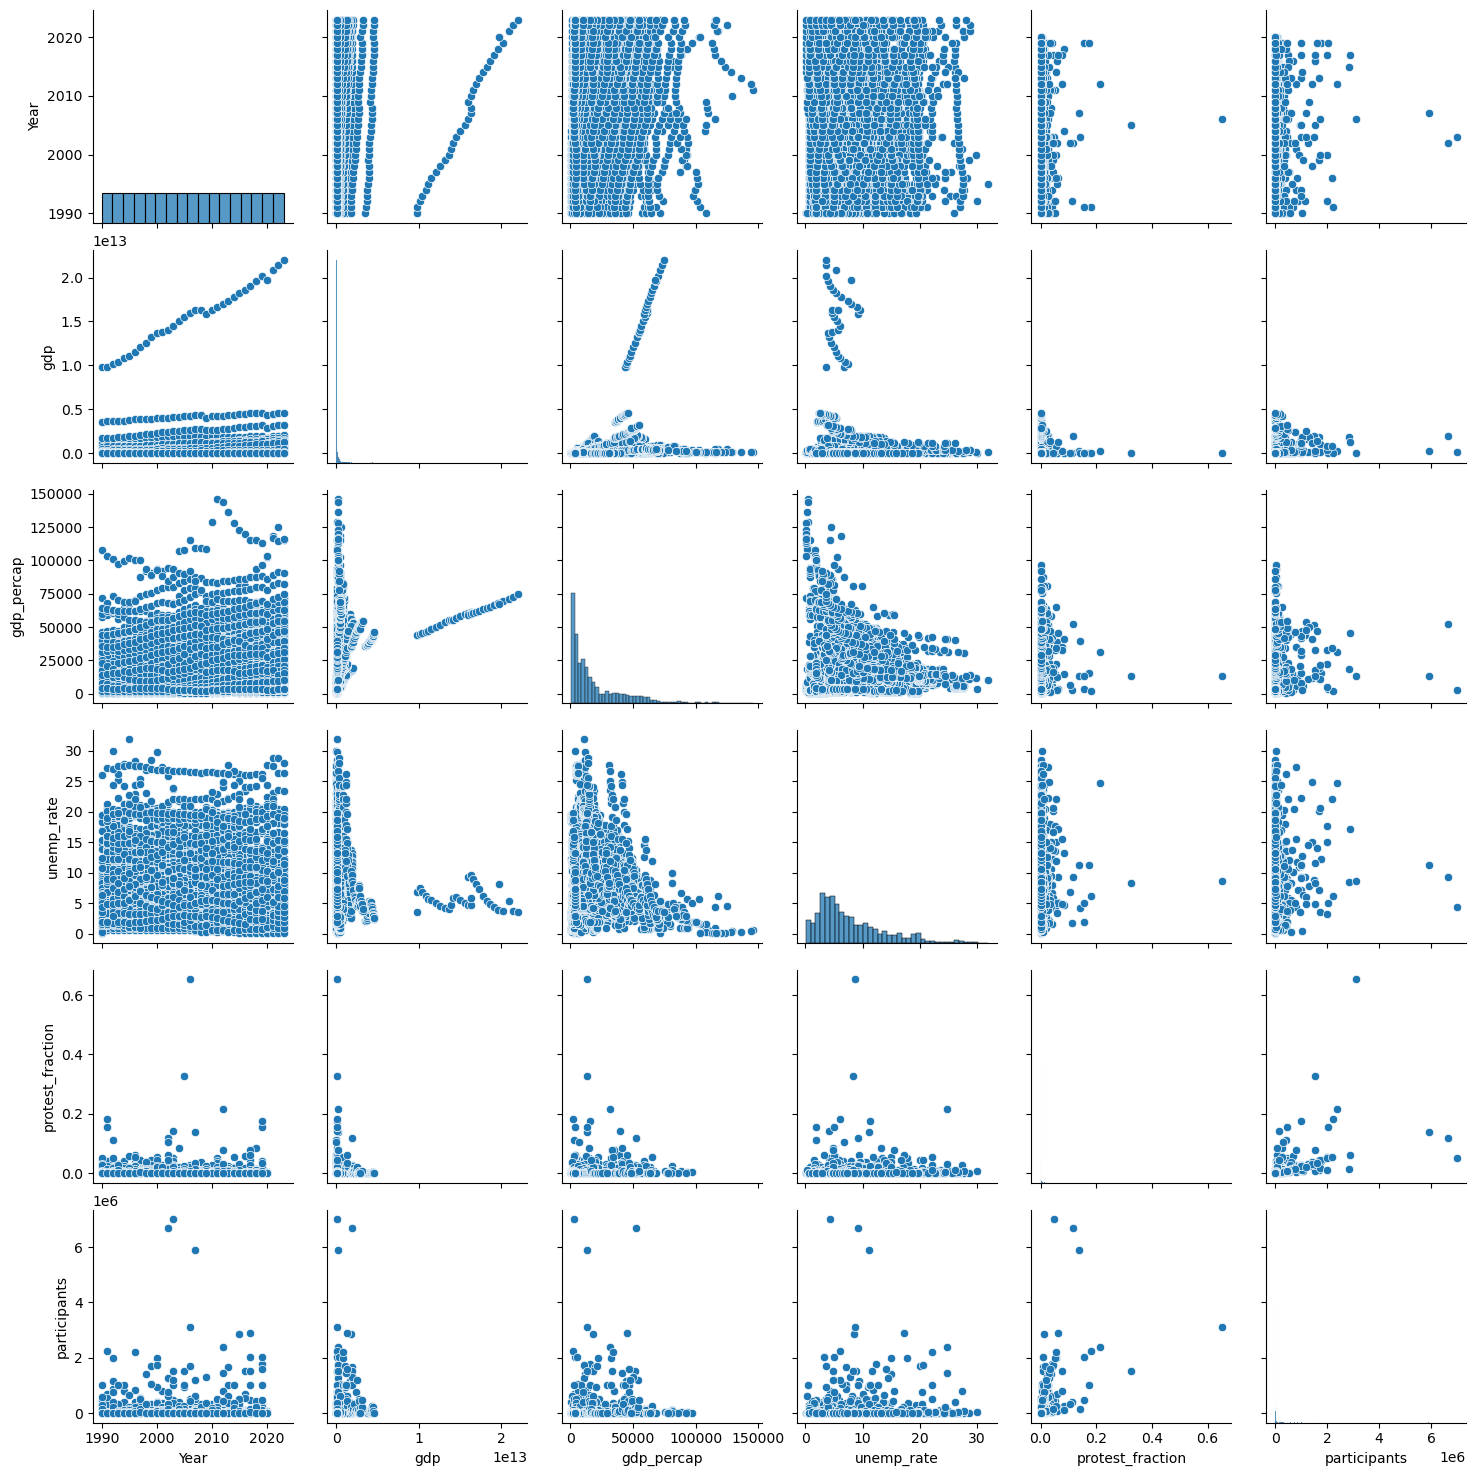

In [8]:
features = ['Year', 'gdp', 'gdp_percap', 'unemp_rate', 'protest_fraction', 'participants']
sns.pairplot(sub_df[features])

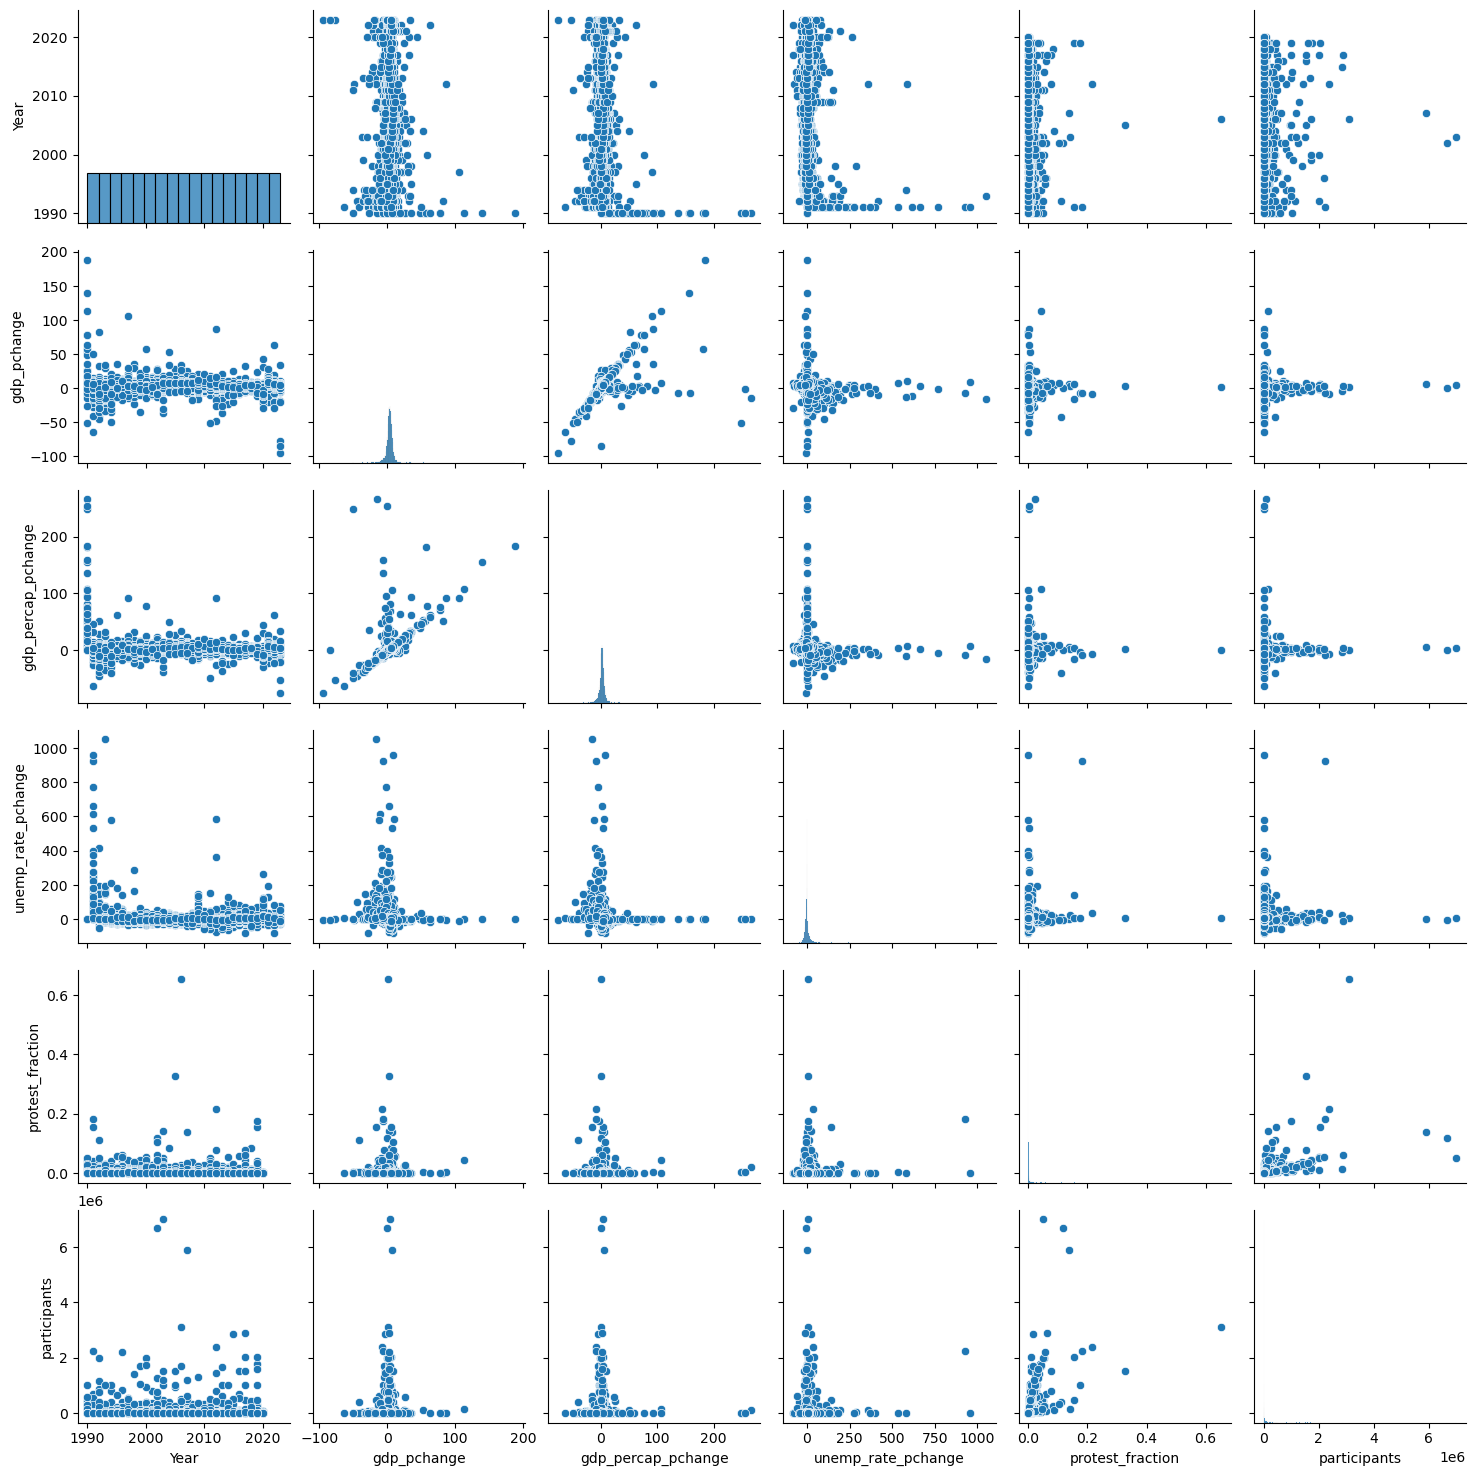

In [9]:
chg_features = ['Year', 'gdp_pchange', 'gdp_percap_pchange', 'unemp_rate_pchange', 'protest_fraction', 'participants']
sns.pairplot(sub_df[chg_features])

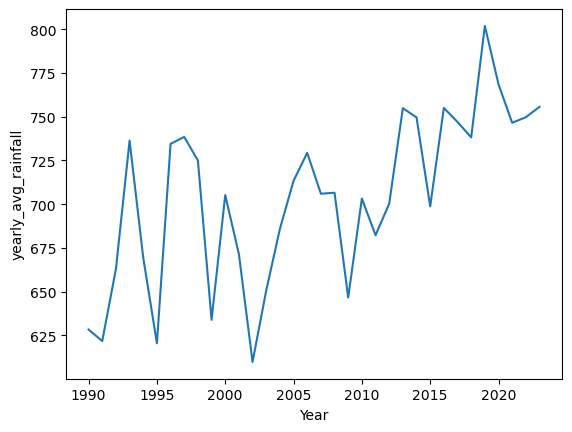

In [10]:
# create new variables ie lower than mean rainfall, classification for high protest vs low protest
# use sub_df

sns.lineplot(sub_df[sub_df['country']=='Ethiopia'], x='Year', y='yearly_avg_rainfall')

mean_rainfall = pd.DataFrame(sub_df.groupby('country').yearly_avg_rainfall.mean().reset_index())
mean_rainfall.rename(columns={'yearly_avg_rainfall':'mean_rainfall'}, inplace=True)

In [11]:
sub_df= sub_df.merge(mean_rainfall, on='country')
sub_df

,ISO3_code,Year,country,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,pt_gdp_agriculture,...,gdp_percap,gdp_percap_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction,mean_rainfall
0,AFG,1990,Afghanistan,311.351190,0.086441,-0.024943,126.622354,0.069567,-0.090091,38.627890,...,1454.1108,0.000000,7.908,0.000000,NaN,NaN,NaN,NaN,NaN,291.204394
1,AFG,1991,Afghanistan,375.068452,0.204648,0.086441,121.137897,-0.043314,0.069567,38.627890,...,1454.1108,0.000000,7.946,0.480526,NaN,NaN,12238879.0,2000.0,0.000163,291.204394
2,AFG,1992,Afghanistan,350.120370,-0.066516,0.204648,118.642526,-0.020599,-0.043314,38.627890,...,1454.1108,0.000000,7.940,-0.075510,NaN,NaN,NaN,NaN,NaN,291.204394
3,AFG,1993,Afghanistan,300.103175,-0.142857,-0.066516,120.815146,0.018312,-0.020599,38.627890,...,1454.1108,0.000000,7.961,0.264484,NaN,NaN,NaN,NaN,NaN,291.204394
4,AFG,1994,Afghanistan,292.960979,-0.023799,-0.142857,123.163360,0.019436,0.018312,38.627890,...,1454.1108,0.000000,7.980,0.238663,NaN,NaN,NaN,NaN,NaN,291.204394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,ZWE,2019,Zimbabwe,647.373718,0.176221,-0.316445,224.837821,0.011953,0.012139,9.819262,...,3294.8062,-7.785577,7.373,8.554181,0.502564,9.453732,15271368.0,650.0,0.000043,578.743929
4688,ZWE,2020,Zimbabwe,586.835256,-0.093514,0.176221,220.788462,-0.018010,0.011953,8.772859,...,2987.2698,-9.333975,8.621,16.926624,0.459157,-8.637195,NaN,NaN,NaN,578.743929
4689,ZWE,2021,Zimbabwe,543.462821,-0.073909,-0.093514,220.451923,-0.001524,-0.018010,8.849899,...,3184.7854,6.611910,9.540,10.660016,0.459157,0.000000,NaN,NaN,NaN,578.743929
4690,ZWE,2022,Zimbabwe,635.176282,0.168758,-0.073909,219.669872,-0.003547,-0.001524,7.170550,...,3323.1218,4.343665,10.087,5.733753,0.459157,0.000000,NaN,NaN,NaN,578.743929


In [12]:
sub_df= sub_df.sort_values(by=['country', 'Year'])

In [13]:
sub_df['lessthan'] = sub_df['yearly_avg_rainfall'] < sub_df['mean_rainfall']

n_below = []

for country in sub_df.country.unique():
    prev = 0
    val = sub_df[sub_df['country']==country]['Year'].nunique()
    for i, yr in enumerate(sub_df[sub_df['country']==country]['Year'].unique()):
        if sub_df[(sub_df['country']==country) & (sub_df['Year']==yr)]['lessthan'].any():
            prev += 1
        else:
            prev = 0
        n_below.append(prev)


In [14]:
sub_df['n_below_rainfall']= n_below

In [15]:
sub_df.tail()
sub_df.drop('lessthan', axis=1, inplace=True)

In [ ]:
# fill in missing protest values with 0 

import sys

sys.path.insert(1, '../../01_exploratory_data_analysis/rainfall')

from missing_value_handler import  fill_na


In [17]:
for country in sub_df['country'].unique():
    fill_na(sub_df, 'protest_fraction', 'country', country, method='value', value=0.0)

In [18]:
sub_df['protest_fraction'].describe()

count    4692.000000
mean        0.001810
std         0.013818
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000204
max         0.652707
Name: protest_fraction, dtype: float64

In [ ]:
# create boolean protest variables by comparing it to the mean by country. If it's higher than the mean, code as 1. 0 otherwise.

mean_fraction = pd.DataFrame(sub_df.groupby('country').protest_fraction.mean().reset_index())
mean_fraction.rename(columns={'protest_fraction':'mean_fraction'}, inplace=True)
sub_df= sub_df.merge(mean_fraction, on='country')
sub_df

,ISO3_code,Year,country,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,pt_gdp_agriculture,...,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction,mean_rainfall,n_below_rainfall,mean_fraction
0,AFG,1990,Afghanistan,311.351190,0.086441,-0.024943,126.622354,0.069567,-0.090091,38.627890,...,7.908,0.000000,NaN,NaN,NaN,NaN,0.000000,291.204394,0,0.000076
1,AFG,1991,Afghanistan,375.068452,0.204648,0.086441,121.137897,-0.043314,0.069567,38.627890,...,7.946,0.480526,NaN,NaN,12238879.0,2000.0,0.000163,291.204394,0,0.000076
2,AFG,1992,Afghanistan,350.120370,-0.066516,0.204648,118.642526,-0.020599,-0.043314,38.627890,...,7.940,-0.075510,NaN,NaN,NaN,NaN,0.000000,291.204394,0,0.000076
3,AFG,1993,Afghanistan,300.103175,-0.142857,-0.066516,120.815146,0.018312,-0.020599,38.627890,...,7.961,0.264484,NaN,NaN,NaN,NaN,0.000000,291.204394,0,0.000076
4,AFG,1994,Afghanistan,292.960979,-0.023799,-0.142857,123.163360,0.019436,0.018312,38.627890,...,7.980,0.238663,NaN,NaN,NaN,NaN,0.000000,291.204394,0,0.000076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,ZWE,2019,Zimbabwe,647.373718,0.176221,-0.316445,224.837821,0.011953,0.012139,9.819262,...,7.373,8.554181,0.502564,9.453732,15271368.0,650.0,0.000043,578.743929,0,0.000236
4688,ZWE,2020,Zimbabwe,586.835256,-0.093514,0.176221,220.788462,-0.018010,0.011953,8.772859,...,8.621,16.926624,0.459157,-8.637195,NaN,NaN,0.000000,578.743929,0,0.000236
4689,ZWE,2021,Zimbabwe,543.462821,-0.073909,-0.093514,220.451923,-0.001524,-0.018010,8.849899,...,9.540,10.660016,0.459157,0.000000,NaN,NaN,0.000000,578.743929,1,0.000236
4690,ZWE,2022,Zimbabwe,635.176282,0.168758,-0.073909,219.669872,-0.003547,-0.001524,7.170550,...,10.087,5.733753,0.459157,0.000000,NaN,NaN,0.000000,578.743929,0,0.000236


In [ ]:
# create boolean protest variables by comparing it to the median by country. If it's higher than the mean, code as 1. 0 otherwise.

m_fraction = pd.DataFrame(sub_df.groupby('country').protest_fraction.quantile(0.5).reset_index())
m_fraction.rename(columns={'protest_fraction':'m_fraction'}, inplace=True)
sub_df= sub_df.merge(m_fraction, on='country')
sub_df

,ISO3_code,Year,country,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,pt_gdp_agriculture,...,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction,mean_rainfall,n_below_rainfall,mean_fraction,m_fraction
0,AFG,1990,Afghanistan,311.351190,0.086441,-0.024943,126.622354,0.069567,-0.090091,38.627890,...,0.000000,NaN,NaN,NaN,NaN,0.000000,291.204394,0,0.000076,0.000000
1,AFG,1991,Afghanistan,375.068452,0.204648,0.086441,121.137897,-0.043314,0.069567,38.627890,...,0.480526,NaN,NaN,12238879.0,2000.0,0.000163,291.204394,0,0.000076,0.000000
2,AFG,1992,Afghanistan,350.120370,-0.066516,0.204648,118.642526,-0.020599,-0.043314,38.627890,...,-0.075510,NaN,NaN,NaN,NaN,0.000000,291.204394,0,0.000076,0.000000
3,AFG,1993,Afghanistan,300.103175,-0.142857,-0.066516,120.815146,0.018312,-0.020599,38.627890,...,0.264484,NaN,NaN,NaN,NaN,0.000000,291.204394,0,0.000076,0.000000
4,AFG,1994,Afghanistan,292.960979,-0.023799,-0.142857,123.163360,0.019436,0.018312,38.627890,...,0.238663,NaN,NaN,NaN,NaN,0.000000,291.204394,0,0.000076,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,ZWE,2019,Zimbabwe,647.373718,0.176221,-0.316445,224.837821,0.011953,0.012139,9.819262,...,8.554181,0.502564,9.453732,15271368.0,650.0,0.000043,578.743929,0,0.000236,0.000035
4688,ZWE,2020,Zimbabwe,586.835256,-0.093514,0.176221,220.788462,-0.018010,0.011953,8.772859,...,16.926624,0.459157,-8.637195,NaN,NaN,0.000000,578.743929,0,0.000236,0.000035
4689,ZWE,2021,Zimbabwe,543.462821,-0.073909,-0.093514,220.451923,-0.001524,-0.018010,8.849899,...,10.660016,0.459157,0.000000,NaN,NaN,0.000000,578.743929,1,0.000236,0.000035
4690,ZWE,2022,Zimbabwe,635.176282,0.168758,-0.073909,219.669872,-0.003547,-0.001524,7.170550,...,5.733753,0.459157,0.000000,NaN,NaN,0.000000,578.743929,0,0.000236,0.000035


In [ ]:
sub_df['highprotest'] = (sub_df['protest_fraction'] > sub_df['mean_fraction']).astype(int)
sub_df['midprotest'] = (sub_df['protest_fraction'] > sub_df['m_fraction']).astype(int)

sub_df.sample(15)

,ISO3_code,Year,country,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,pt_gdp_agriculture,...,gini,gini_pchange,population,participants,protest_fraction,mean_rainfall,n_below_rainfall,mean_fraction,m_fraction,highprotest
842,CHL,2016,Chile,702.663371,-0.158754,-0.016168,84.767420,-0.003878,0.027158,4.199090,...,0.505462,11.474395,18267221.0,29225.0,0.001600,863.182023,4,0.003203,0.000321,0
3972,LKA,2018,Sri Lanka,1374.609649,0.001454,0.293506,274.644737,-0.003136,-0.010133,7.592064,...,0.368815,0.000000,21670000.0,40000.0,0.001846,1392.769350,3,0.000731,0.000027,1
2024,IRQ,2008,Iraq,122.314371,-0.244654,-0.216520,226.592814,0.008782,-0.004718,3.847780,...,0.290712,0.000000,28971036.0,13365.0,0.000461,176.716435,2,0.000408,0.000043,1
1077,CYP,2013,Cyprus,266.194444,-0.564330,0.423597,194.277778,-0.000429,0.045577,2.036336,...,0.370418,7.954554,1183895.0,6700.0,0.005659,376.205065,1,0.011411,0.000269,0
372,BLR,2022,Belarus,577.254464,-0.009089,0.121387,78.214286,0.097286,-0.201919,8.041819,...,0.277990,0.000000,NaN,NaN,0.000000,545.773065,0,0.001055,0.000123,0
4039,SWE,2017,Sweden,562.726780,0.073319,-0.089193,25.125129,-0.122239,-0.132868,1.315257,...,0.287741,-2.662513,10057698.0,650.0,0.000065,542.011299,0,0.000064,0.000000,1
426,BEN,2008,Benin,951.070833,0.045461,0.139681,280.050000,-0.014017,-0.000894,26.826157,...,0.403983,0.000000,9228466.0,50.0,0.000005,845.133088,0,0.000515,0.000007,0
2301,KWT,2013,Kuwait,83.055556,-0.082541,0.250096,262.402778,-0.017116,0.011897,0.355178,...,NaN,NaN,3507844.0,1400.0,0.000399,96.111928,7,0.000442,0.000000,0
231,AUS,2017,Australia,399.551312,-0.057130,0.108481,224.478073,0.005059,0.000940,2.706447,...,0.335056,-0.533138,NaN,NaN,0.000000,409.058887,1,0.000000,0.000000,0
770,CAF,2012,Central African Republic,1157.944167,0.036054,-0.018935,255.299167,0.000093,-0.019960,36.814167,...,0.528261,0.000000,4610848.0,100.0,0.000022,1122.799559,0,0.001353,0.000016,0


In [ ]:
# create boolean protest as 1 and 0 if protest happened or not. 

sub_df['yprotest'] = (sub_df['protest_fraction']>0).astype(int)

In [63]:
print(sub_df.highprotest.value_counts(normalize=True), sub_df.midprotest.value_counts(normalize=True), sub_df.yprotest.value_counts(normalize=True))

highprotest
0    0.854007
1    0.145993
Name: proportion, dtype: float64 midprotest
0    0.634271
1    0.365729
Name: proportion, dtype: float64 yprotest
0    0.523018
1    0.476982
Name: proportion, dtype: float64


# Protest as Linear Outcome

In [65]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_squared_error

In [66]:
sub_df.shape

(4692, 31)

In [67]:
# use sub_df

reg_feats= ['Year','rainfall_var_t', 'rainfall_var_t_1', 'n_below_rainfall', 'pt_gdp_agriculture',
            'gdp', 'unemp_rate', 'oil_rent', 'democracy_polity',
            'ethnic_fractionation_index']

#should we split up train,test by year? take 0.8 for train
train, test = train_test_split(sub_df, test_size=0.2, 
                               shuffle=True, random_state=216)

lr = LinearRegression()
lr.fit(train[reg_feats], train['protest_fraction'])
lr.coef_
lr.score(train[reg_feats], train['protest_fraction'])

0.010504314358514177

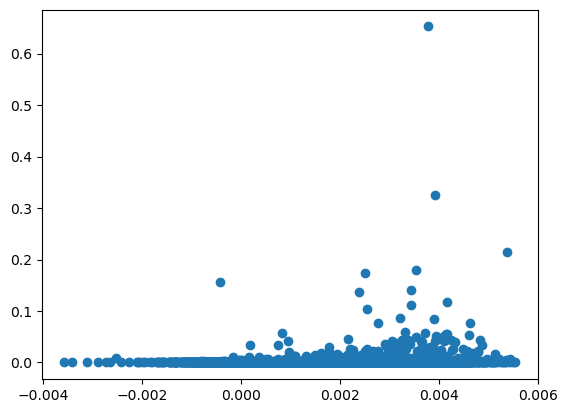

In [68]:
preds = lr.predict(train[reg_feats])
y = train['protest_fraction']
plt.scatter(preds, y)

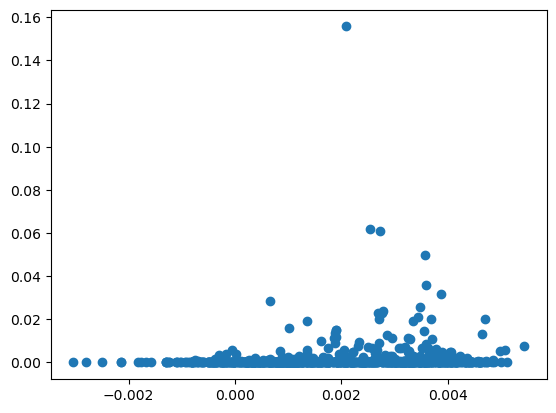

In [69]:
preds = lr.predict(test[reg_feats])
y = test['protest_fraction']
plt.scatter(preds, y)

In [70]:
from sklearn.model_selection import KFold

In [71]:
#try all features for now

kfold = KFold(5)

rmses = np.zeros((3, 5))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(train):
     ## cv training set
    df_tt = train.iloc[train_index]
    
    ## cv holdout set
    df_ho = train.iloc[test_index]
    

    mlr = LinearRegression()
    mlr.fit(df_tt[reg_feats], df_tt['protest_fraction'])
    rmses[0,i] = root_mean_squared_error(df_ho['protest_fraction'], mlr.predict(df_ho[reg_feats]))

    ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])
    ridge_pipe.fit(df_tt[reg_feats], df_tt['protest_fraction'])
    rmses[1,i] = root_mean_squared_error(df_ho['protest_fraction'], ridge_pipe.predict(df_ho[reg_feats]))

    lasso_pipe = Pipeline([('scale', StandardScaler()), ('lasso', Lasso())])
    lasso_pipe.fit(df_tt[reg_feats], df_tt['protest_fraction'])
    rmses[2,i] = root_mean_squared_error(df_ho['protest_fraction'], lasso_pipe.predict(df_ho[reg_feats]))

    i = i + 1

rmses.mean(axis = 1), rmses.std(axis = 1)


(array([0.01383325, 0.01383323, 0.01389282]),
 array([0.00581284, 0.00581285, 0.00580733]))

In [72]:
#try just gdp/econ features
gdp_feats= ['Year', 
            'gdp', 'unemp_rate', 'oil_rent', 'democracy_polity',
            'ethnic_fractionation_index']
kfold = KFold(5)

rmses = np.zeros((3, 5))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(train):
     ## cv training set
    df_tt = train.iloc[train_index]
    
    ## cv holdout set
    df_ho = train.iloc[test_index]
    

    mlr = LinearRegression()
    mlr.fit(df_tt[gdp_feats], df_tt['protest_fraction'])
    rmses[0,i] = root_mean_squared_error(df_ho['protest_fraction'], mlr.predict(df_ho[gdp_feats]))

    ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])
    ridge_pipe.fit(df_tt[gdp_feats], df_tt['protest_fraction'])
    rmses[1,i] = root_mean_squared_error(df_ho['protest_fraction'], ridge_pipe.predict(df_ho[gdp_feats]))

    lasso_pipe = Pipeline([('scale', StandardScaler()), ('lasso', Lasso())])
    lasso_pipe.fit(df_tt[gdp_feats], df_tt['protest_fraction'])
    rmses[2,i] = root_mean_squared_error(df_ho['protest_fraction'], lasso_pipe.predict(df_ho[gdp_feats]))

    i = i + 1

rmses.mean(axis = 1), rmses.std(axis = 1)

(array([0.01381459, 0.01381458, 0.01389282]),
 array([0.00581585, 0.00581586, 0.00580733]))

In [73]:
#try just gdp/econ change features
gdp_c_feats= ['Year', 
            'gdp_pchange', 'unemp_rate_pchange', 'oil_rent', 'democracy_polity',
            'ethnic_fractionation_index']
kfold = KFold(5)

rmses = np.zeros((3, 5))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(train):
     ## cv training set
    df_tt = train.iloc[train_index]
    
    ## cv holdout set
    df_ho = train.iloc[test_index]
    

    mlr = LinearRegression()
    mlr.fit(df_tt[gdp_c_feats], df_tt['protest_fraction'])
    rmses[0,i] = root_mean_squared_error(df_ho['protest_fraction'], mlr.predict(df_ho[gdp_c_feats]))

    ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])
    ridge_pipe.fit(df_tt[gdp_c_feats], df_tt['protest_fraction'])
    rmses[1,i] = root_mean_squared_error(df_ho['protest_fraction'], ridge_pipe.predict(df_ho[gdp_c_feats]))

    lasso_pipe = Pipeline([('scale', StandardScaler()), ('lasso', Lasso())])
    lasso_pipe.fit(df_tt[gdp_c_feats], df_tt['protest_fraction'])
    rmses[2,i] = root_mean_squared_error(df_ho['protest_fraction'], lasso_pipe.predict(df_ho[gdp_c_feats]))

    i = i + 1

rmses.mean(axis = 1), rmses.std(axis = 1)

(array([0.01385369, 0.01385365, 0.01389282]),
 array([0.00582596, 0.00582597, 0.00580733]))

In [74]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
coefs = np.zeros((len(alphas), len(gdp_feats)))
for i,alpha in enumerate(alphas):
    # Make a pipeline where you first scale and then lasso.
    # Use max_iter=100000 in your Lasso to avoid some convergence issues.
    lasso_pipe = Pipeline([('scale', StandardScaler()),('lasso', Lasso(alpha = alpha, max_iter=100000))])

    # Fit it to data
    lasso_pipe.fit(train[gdp_c_feats], train['protest_fraction'])

    # Store the coefficients in the ith row of coefs 
    coefs[i,:] = lasso_pipe['lasso'].coef_

pd.DataFrame(coefs)

,0,1,2,3,4,5
0,-0.000175,-0.000257,0.001122,-0.000086,0.000857,-0.000809
1,-0.000096,-0.000183,0.001053,-0.000023,0.000811,-0.000744
2,-0.000000,-0.000000,0.000185,-0.000000,0.000075,-0.000044
3,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
4,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
5,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
6,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
7,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000
8,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000


In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(RandomForestRegressor(),
                       param_grid= {'max_depth':range(1,11),
                                    'n_estimators':[100,500]},
                        scoring = 'neg_root_mean_squared_error',
                        cv=5)
grid_cv.fit(train[gdp_feats], train['protest_fraction'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 11), 'n_estimators': [100, 500]},
             scoring='neg_root_mean_squared_error')

In [76]:
print(grid_cv.best_params_, grid_cv.best_score_)

{'max_depth': 8, 'n_estimators': 100} -0.01299991258284039


In [77]:
feature_importance_df = pd.DataFrame({
    'Feature': gdp_feats,  # List of feature names
    'Importance': grid_cv.best_estimator_.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Reset index for better readability
feature_importance_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(feature_importance_df)

                      Feature  Importance
0                  unemp_rate    0.312849
1                         gdp    0.276612
2  ethnic_fractionation_index    0.167392
3                        Year    0.146248
4            democracy_polity    0.049712
5                    oil_rent    0.047187


In [78]:
grid_cv_c = GridSearchCV(RandomForestRegressor(),
                       param_grid= {'max_depth':range(1,11),
                                    'n_estimators':[100,500]},
                        scoring = 'neg_root_mean_squared_error',
                        cv=5)
grid_cv_c.fit(train[gdp_c_feats], train['protest_fraction'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 11), 'n_estimators': [100, 500]},
             scoring='neg_root_mean_squared_error')

In [79]:
print(grid_cv_c.best_params_, grid_cv_c.best_score_)

{'max_depth': 10, 'n_estimators': 100} -0.013107295104455111


In [80]:
feature_importance_df = pd.DataFrame({
    'Feature': gdp_c_feats,  # List of feature names
    'Importance': grid_cv_c.best_estimator_.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Reset index for better readability
feature_importance_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(feature_importance_df)

                      Feature  Importance
0          unemp_rate_pchange    0.411815
1                 gdp_pchange    0.300806
2  ethnic_fractionation_index    0.135678
3                        Year    0.072627
4                    oil_rent    0.041679
5            democracy_polity    0.037395


# Try Logistic Regression for High Protest outcome

In [42]:
sub_df.highprotest.value_counts(normalize=True)

highprotest
0    0.854007
1    0.145993
Name: proportion, dtype: float64

In [43]:
train.highprotest.value_counts(normalize=True)

highprotest
0    0.851852
1    0.148148
Name: proportion, dtype: float64

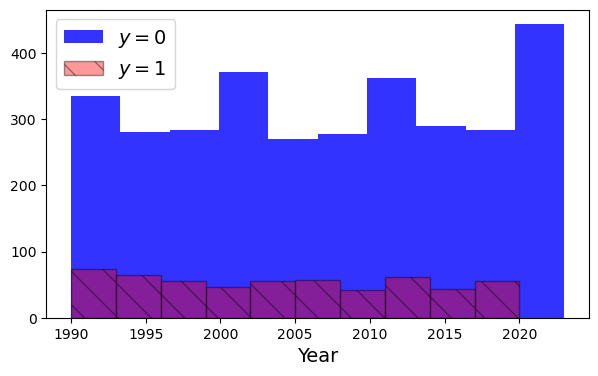

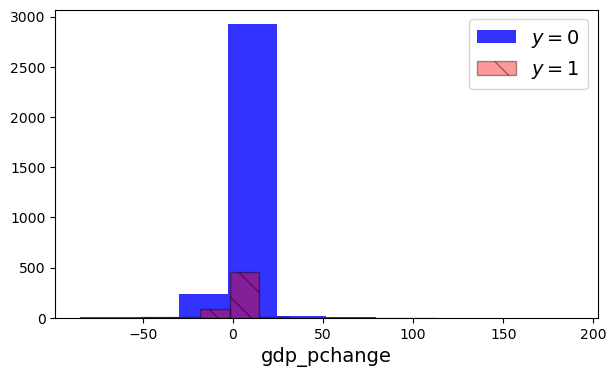

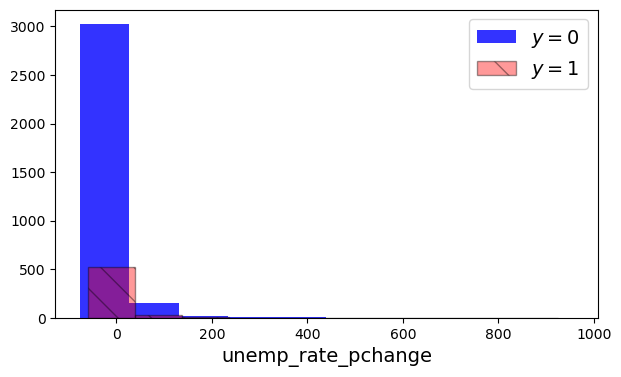

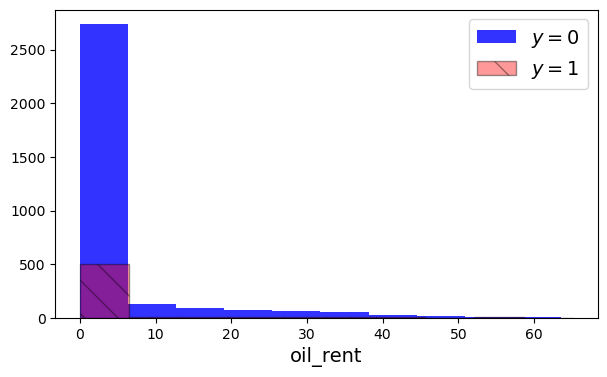

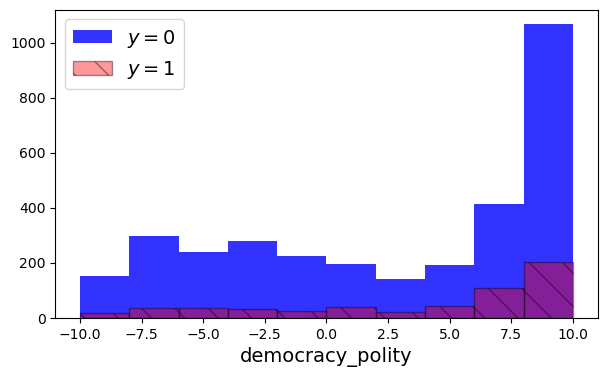

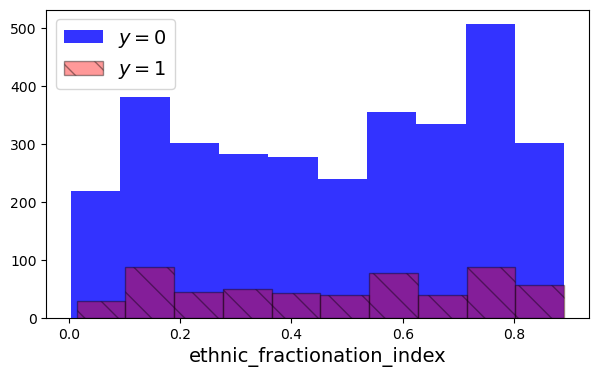

In [45]:
for col in gdp_c_feats:
    plt.figure(figsize=(7,4))


    plt.hist(train.loc[train.highprotest==0, col].values,
                color='blue',
                alpha=.8,
                label="$y=0$")

    plt.hist(train.loc[train.highprotest==1, col].values,
                color='red',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="$y=1$")

    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)

    plt.show()

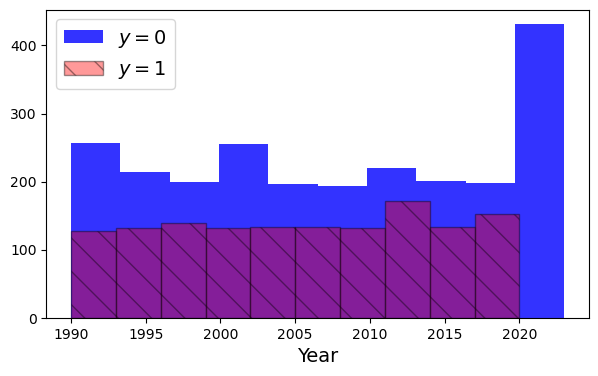

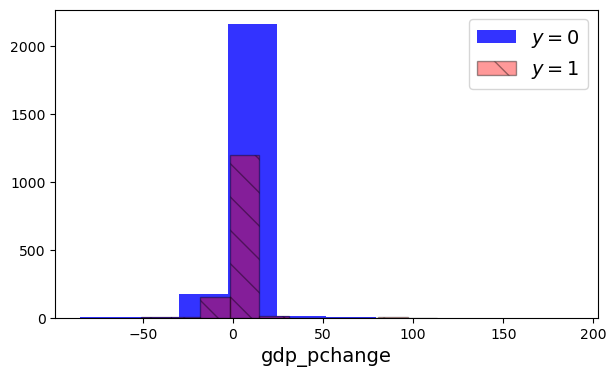

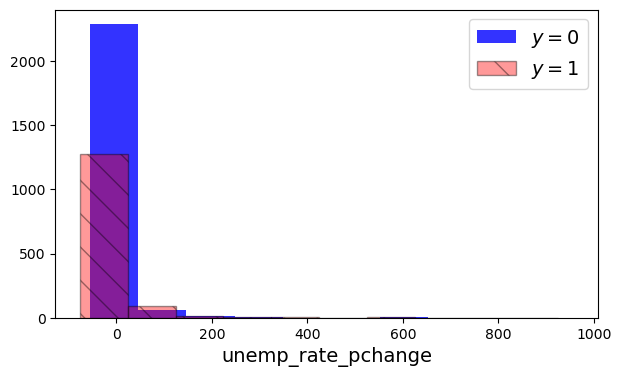

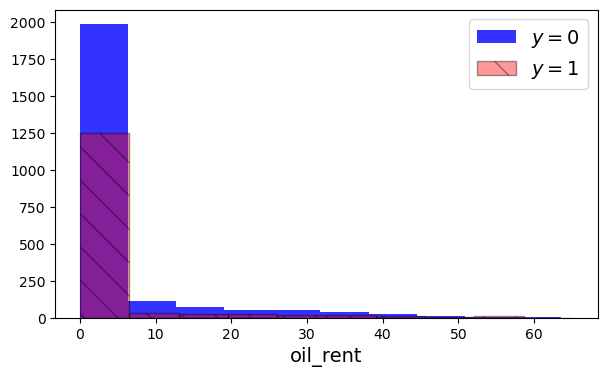

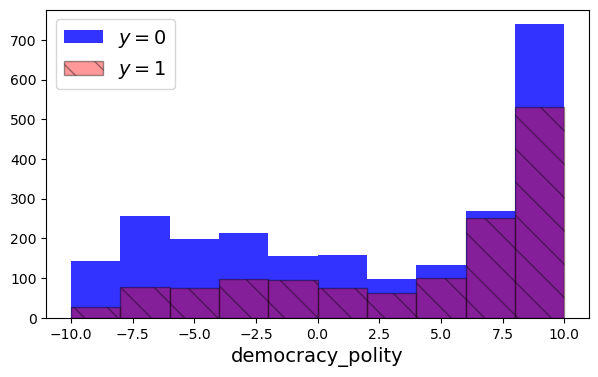

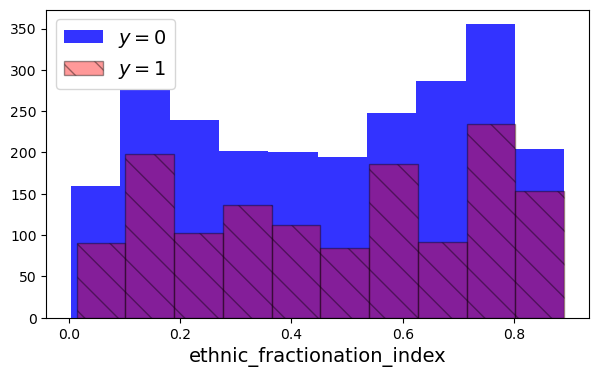

In [47]:
for col in gdp_c_feats:
    plt.figure(figsize=(7,4))


    plt.hist(train.loc[train.midprotest==0, col].values,
                color='blue',
                alpha=.8,
                label="$y=0$")

    plt.hist(train.loc[train.midprotest==1, col].values,
                color='red',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="$y=1$")

    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)

    plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [81]:
n_splits = 5

stratkfold = StratifiedKFold(n_splits,
                           shuffle=True,
                           random_state=216)

In [50]:
# try all gdp features and gdp_c features

log_reg_accs = np.zeros((n_splits, len(gdp_feats)))

i = 0
for train_index, test_index in stratkfold.split(train, train.highprotest):
    df_tt = train.iloc[train_index]
    df_ho = train.iloc[test_index]
    
    j = 0
    for feature in gdp_feats:
        log_reg = LogisticRegression(penalty=None)
        
        log_reg.fit(df_tt[feature].values.reshape(-1,1),
                       df_tt.highprotest.values)
        
        pred = log_reg.predict(df_ho[feature].values.reshape(-1,1))
        
        log_reg_accs[i,j] = accuracy_score(df_ho.highprotest.values,
                                              pred)
        
        j = j + 1
    i = i + 1

In [51]:
np.mean(log_reg_accs, axis = 0)

array([0.85185193, 0.85185193, 0.85185193, 0.85185193, 0.85185193,
       0.85185193])

In [52]:
full_log_accs = np.zeros(n_splits)

i = 0
for train_index, test_index in stratkfold.split(train, train.highprotest):
    df_tt = train.iloc[train_index]
    df_ho = train.iloc[test_index]
    
    log_reg = LogisticRegression(penalty=None,
                                     max_iter = 1000)
        
    log_reg.fit(df_tt[gdp_feats].values,
                   df_tt.highprotest.values)
        
    pred = log_reg.predict(df_ho[gdp_feats].values)
    
    full_log_accs[i] = accuracy_score(df_ho.highprotest.values,
                                              pred)
    
    i = i + 1

In [53]:
np.mean(full_log_accs)

0.851851930758988

In [54]:
train.highprotest.value_counts(normalize=True)

highprotest
0    0.851852
1    0.148148
Name: proportion, dtype: float64

In [55]:
random_accs = []

for i in range(1000):
    draw = np.random.binomial(n=1,
                                 p=train.highprotest.sum()/len(train),
                                 size=len(train))
    
    random_accs.append(accuracy_score(train.highprotest.values, draw))

np.mean(random_accs)

0.7477655209166001

In [56]:
# try all gdp features and gdp_c features

log_reg_accs2 = np.zeros((n_splits, len(gdp_c_feats)))

i = 0
for train_index, test_index in stratkfold.split(train, train.highprotest):
    df_tt = train.iloc[train_index]
    df_ho = train.iloc[test_index]
    
    j = 0
    for feature in gdp_c_feats:
        log_reg = LogisticRegression(penalty=None)
        
        log_reg.fit(df_tt[feature].values.reshape(-1,1),
                       df_tt.highprotest.values)
        
        pred = log_reg.predict(df_ho[feature].values.reshape(-1,1))
        
        log_reg_accs[i,j] = accuracy_score(df_ho.highprotest.values,
                                              pred)
        
        j = j + 1
    i = i + 1

In [57]:
np.mean(log_reg_accs2, axis = 0)

array([0., 0., 0., 0., 0., 0.])

In [58]:
full_log_accs = np.zeros(n_splits)

i = 0
for train_index, test_index in stratkfold.split(train, train.highprotest):
    df_tt = train.iloc[train_index]
    df_ho = train.iloc[test_index]
    
    log_reg = LogisticRegression(penalty=None,
                                     max_iter = 1000)
        
    log_reg.fit(df_tt[gdp_c_feats].values,
                   df_tt.highprotest.values)
        
    pred = log_reg.predict(df_ho[gdp_c_feats].values)
    
    full_log_accs[i] = accuracy_score(df_ho.highprotest.values,
                                              pred)
    
    i = i + 1

In [59]:
np.mean(full_log_accs)

0.8515856191744341

# Logistic and other models for Protest Y/N

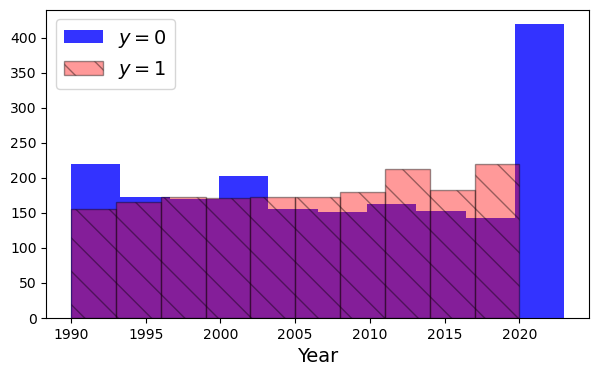

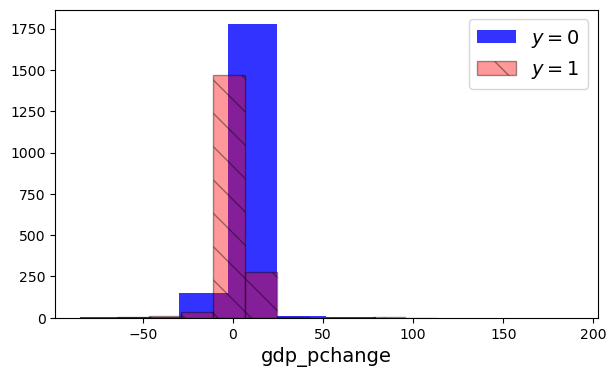

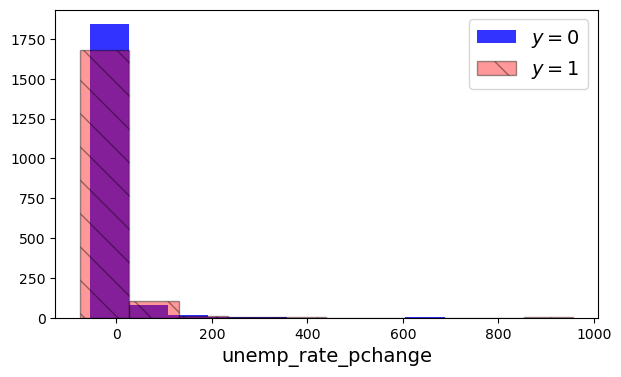

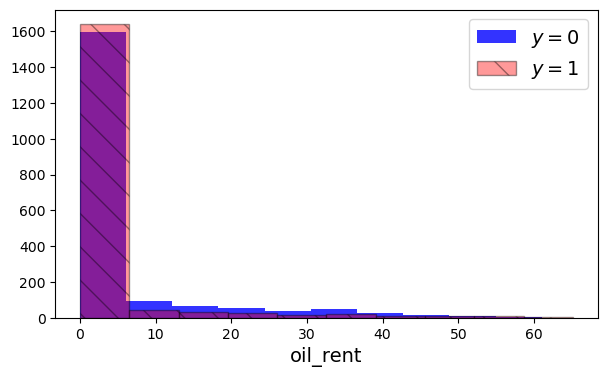

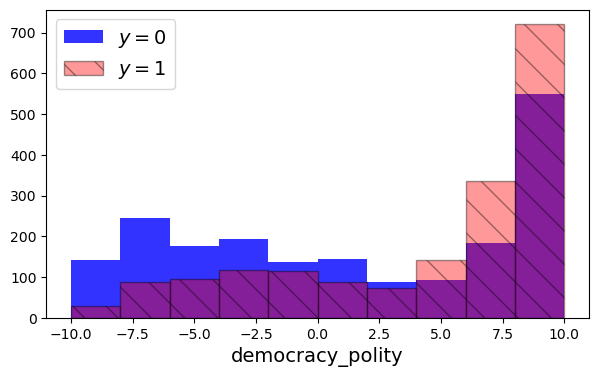

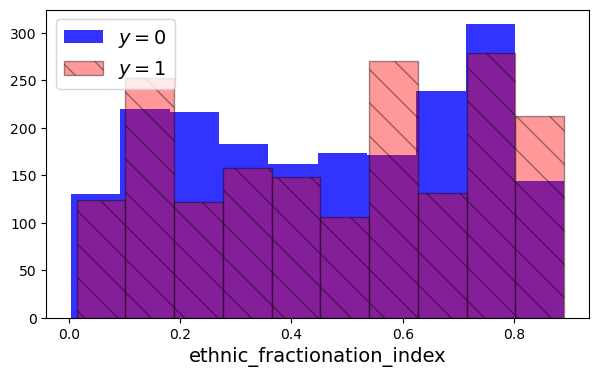

In [82]:
for col in gdp_c_feats:
    plt.figure(figsize=(7,4))

    plt.hist(train.loc[train.yprotest==0, col].values,
                color='blue',
                alpha=.8,
                label="$y=0$")

    plt.hist(train.loc[train.yprotest==1, col].values,
                color='red',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="$y=1$")

    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)

    plt.show()

In [83]:
full_log_accs = np.zeros(n_splits)

i = 0
for train_index, test_index in stratkfold.split(train, train.yprotest):
    df_tt = train.iloc[train_index]
    df_ho = train.iloc[test_index]
    
    log_reg = LogisticRegression(penalty=None,
                                     max_iter = 1000)
        
    log_reg.fit(df_tt[gdp_feats].values,
                   df_tt.yprotest.values)
        
    pred = log_reg.predict(df_ho[gdp_feats].values)
    
    full_log_accs[i] = accuracy_score(df_ho.yprotest.values,
                                              pred)
    
    i = i + 1

In [84]:
np.mean(full_log_accs)

0.5193178872614292

In [ ]:
# try all gdp features 

log_reg_accs = np.zeros((n_splits, len(gdp_feats)))

i = 0
for train_index, test_index in stratkfold.split(train, train.yprotest):
    df_tt = train.iloc[train_index]
    df_ho = train.iloc[test_index]
    
    j = 0
    for feature in gdp_feats:
        log_reg = LogisticRegression(penalty=None)
        
        log_reg.fit(df_tt[feature].values.reshape(-1,1),
                       df_tt.yprotest.values)
        
        pred = log_reg.predict(df_ho[feature].values.reshape(-1,1))
        
        log_reg_accs[i,j] = accuracy_score(df_ho.yprotest.values,
                                              pred)
        
        j = j + 1
    i = i + 1

In [87]:
print(gdp_feats, np.mean(log_reg_accs, axis=1))

['Year', 'gdp', 'unemp_rate', 'oil_rent', 'democracy_polity', 'ethnic_fractionation_index'] [0.54349756 0.53328895 0.54438526 0.52533333 0.53488889]


In [88]:
full_log_accs = np.zeros(n_splits)

i = 0
for train_index, test_index in stratkfold.split(train, train.yprotest):
    df_tt = train.iloc[train_index]
    df_ho = train.iloc[test_index]
    
    log_reg = LogisticRegression(penalty=None,
                                     max_iter = 1000)
        
    log_reg.fit(df_tt[gdp_c_feats].values,
                   df_tt.yprotest.values)
        
    pred = log_reg.predict(df_ho[gdp_c_feats].values)
    
    full_log_accs[i] = accuracy_score(df_ho.yprotest.values,
                                              pred)
    
    i = i + 1

In [89]:
np.mean(full_log_accs)

0.6136376387039503

In [90]:
# try all  gdp_c features

log_reg_accs = np.zeros((n_splits, len(gdp_feats)))

i = 0
for train_index, test_index in stratkfold.split(train, train.yprotest):
    df_tt = train.iloc[train_index]
    df_ho = train.iloc[test_index]
    
    j = 0
    for feature in gdp_c_feats:
        log_reg = LogisticRegression(penalty=None)
        
        log_reg.fit(df_tt[feature].values.reshape(-1,1),
                       df_tt.yprotest.values)
        
        pred = log_reg.predict(df_ho[feature].values.reshape(-1,1))
        
        log_reg_accs[i,j] = accuracy_score(df_ho.yprotest.values,
                                              pred)
        
        j = j + 1
    i = i + 1

In [92]:
print(gdp_c_feats, np.mean(log_reg_accs, axis=1))

['Year', 'gdp_pchange', 'unemp_rate_pchange', 'oil_rent', 'democracy_polity', 'ethnic_fractionation_index'] [0.54416334 0.53861518 0.54527297 0.52377778 0.53333333]


In [93]:
grid_cv_c = GridSearchCV(RandomForestRegressor(),
                       param_grid= {'max_depth':range(1,11),
                                    'n_estimators':[100,500]},
                        scoring = 'neg_root_mean_squared_error',
                        cv=5)
grid_cv_c.fit(train[gdp_c_feats], train['yprotest'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 11), 'n_estimators': [100, 500]},
             scoring='neg_root_mean_squared_error')

In [94]:
feature_importance_df = pd.DataFrame({
    'Feature': gdp_c_feats,  # List of feature names
    'Importance': grid_cv_c.best_estimator_.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Reset index for better readability
feature_importance_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(feature_importance_df)

                      Feature  Importance
0                        Year    0.241918
1  ethnic_fractionation_index    0.223452
2            democracy_polity    0.164895
3                    oil_rent    0.145259
4                 gdp_pchange    0.123676
5          unemp_rate_pchange    0.100799
